# Universidad Autonoma de Aguascalientes
### Centro de Ciencias Basicas
### Departamento de Ciencias de la Computacion
### Carrera: Ingenieria en Computacion Inteligente
### Materia: Machine Learning 
### Profesor: Dr. Francisco Javier Luna Rosas
### Proyecto Final
### Integrantes: 
- #### Diego Alberto Aranda Gonzalez
- #### Dante Alejandro Alegría Romero
- #### Andrea Margarita Balandrán Félix
- #### Diego Emilio Moreno Sánchez

Este proyecto junta técnicas de scrapping para extraer datos de la web, en conjutno con técnicas de aprendizaje supervisado y no supervisado, en este caso SVM y bosques aleatorios, estos modelos serán utilizados para clasificar noticias en base a su título en 3 diferentes clasificaciones: Política, Deportes y Negocios.

### Recolección de datos con webmining

Importamos las librerías necesarias

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Definimos las urls de donde vamos a extraer la información

In [2]:
urls_deportes = [
    'https://www.skysports.com/football/olympiakos-vs-a-villa/report/504410',
    'https://www.skysports.com/nfl/news/12118/13124057/2024-nfl-draft-englands-travis-clayton-selected-by-buffalo-bills-in-seventh-round',
    # mas urls aquí
]
data_deportes = []

urls_politica = [
    'https://apnews.com/article/biden-netanyahu-rafah-hamas-military-assistance-5c743e621c5594b49e0a89c985a605f3',
    'https://apnews.com/article/america-first-trump-biden-russia-ukraine-policy-54080728c6e549c8312c4d71150480ba',
    # mas urls aquí
]
data_politica = []

urls_business = [
    'https://www.economist.com/business/2024/05/09/for-gen-z-job-seekers-tiktok-is-the-new-linkedin',
    'https://www.economist.com/business/2024/05/09/can-alibaba-get-the-magic-back',
    # mas urls aquí
]
data_business = []

Extraemos la información necesaria de cada fuente, dependiendo de la página la información que necesitamos se encuentran en diferentes selectores y etiquetas html, por ello cada función es diferente. Recordar que las páginas para que este método funcione necesitan ser renderizadas por el servidor, puedes conocer más [aquí](https://solutionshub.epam.com/blog/post/what-is-server-side-rendering).

In [ ]:
for url in urls_deportes: 
    # Realizar la solicitud HTTP y obtener el contenido HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Buscar el titulo de la noticia
    if ("fox" in url):
        news_title = soup.find_all('h1', class_='story-title')
    elif ("mundo" in url):
        news_title = soup.find_all('h1', class_='title')
    else:
        news_title = soup.find_all('span', class_='sdc-article-header__long-title')
        
    print("Parsed:", url, news_title)
    data_deportes.append({'Title': news_title, 'Category': "Sports"})
    
for url in urls_politica: 
    # Realizar la solicitud HTTP y obtener el contenido HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Buscar el titulo de la noticia
    news_title = ""
    if ("bbc" in url):
        news_title = soup.find_all('h1', class_='sc-82e6a0ec-0 fxXQuy')
    elif ("apnews" in url):
        news_title = soup.find_all('h1', class_='Page-headline')
    elif ("nbcnews" in url):
        news_title = soup.find_all('h1', class_='article-hero-headline__htag lh-none-print black-print')
    elif ("foxnews" in url):
        news_title = soup.find_all('h1', class_='headline speakable')

    print("Parsed:", url, news_title)
    data_politica.append({'Title': news_title, 'Category': "Politics"})
    
for url in urls_business: 
    # Realizar la solicitud HTTP y obtener el contenido HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Buscar el titulo de la noticia
    news_title = ""
    if ("bbc" in url):
        news_title = soup.find_all('h1', class_='sc-82e6a0ec-0 fxXQuy')
    elif ("economist" in url):
        news_title = soup.find_all('h1', class_='css-1p83fk8 e1r8fcie0')
    elif ("nbcnews" in url):
        news_title = soup.find_all('h1', class_='article-hero-headline__htag lh-none-print black-print')
    elif ("economictimes" in url):
        news_title = soup.find_all('h1', class_='artTitle font_faus')

    print("Parsed:", url, news_title)
    data_business.append({'Title': news_title, 'Category': "Business"})

Por último convertimos la información a data frames y luego la guardamos en un excel

In [ ]:
df1 = pd.DataFrame(data_deportes)
df2 = pd.DataFrame(data_politica)
df3 = pd.DataFrame(data_business)

In [ ]:
df1.to_excel('deportes.xlsx', index=False)
df2.to_excel('politica.xlsx', index=False)
df3.to_excel('negocios.xlsx', index=False)

### Modelos

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### SVM

Las Máquinas de Vectores de Soporte (SVM) son algoritmos de aprendizaje supervisado que se utilizan comúnmente para problemas de clasificación y regresión. La idea fundamental detrás de las SVM es encontrar el hiperplano que mejor separa las clases en un espacio dimensional más alto. Este hiperplano se elige de manera que maximice el margen entre las clases, lo que ayuda a garantizar una buena generalización del modelo a datos no vistos.

Classification Report:
              precision    recall  f1-score   support

    Business       1.00      0.67      0.80         3
    Politics       0.60      0.75      0.67         4
      Sports       0.90      0.90      0.90        10

    accuracy                           0.82        17
   macro avg       0.83      0.77      0.79        17
weighted avg       0.85      0.82      0.83        17

Confusion Matrix:
[[2 1 0]
 [0 3 1]
 [0 1 9]]


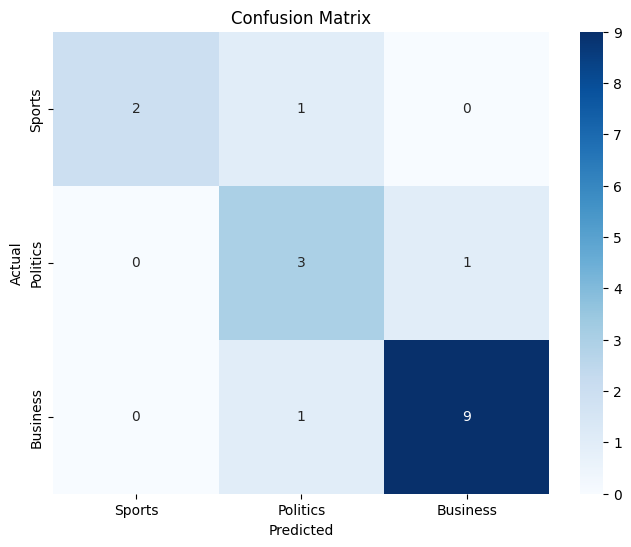

In [5]:
# Cargar los datos desde los archivos Excel
df_sports = pd.read_excel('deportes.xlsx')
df_politics = pd.read_excel('politica.xlsx')
df_business = pd.read_excel('negocios.xlsx')

# Combinar los datos en un solo DataFrame
df = pd.concat([df_sports, df_politics, df_business], ignore_index=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Title'].astype(str), df['Category'], test_size=0.2, random_state=42)

# Vectorización de los datos de texto
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenamiento del modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sports', 'Politics', 'Business'], yticklabels=['Sports', 'Politics', 'Business'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Bosques Aleatorios

Los Bosques Aleatorios son un tipo de algoritmo de aprendizaje en conjunto que se basa en la idea de construir múltiples árboles de decisión y combinar sus resultados para obtener una predicción final. Cada árbol de decisión en el bosque se entrena de forma independiente utilizando subconjuntos aleatorios de datos y características.


Classification Report:
              precision    recall  f1-score   support

    Business       0.60      1.00      0.75         3
    Politics       1.00      0.25      0.40         4
      Sports       0.91      1.00      0.95        10

    accuracy                           0.82        17
   macro avg       0.84      0.75      0.70        17
weighted avg       0.88      0.82      0.79        17

Confusion Matrix:
[[ 3  0  0]
 [ 2  1  1]
 [ 0  0 10]]


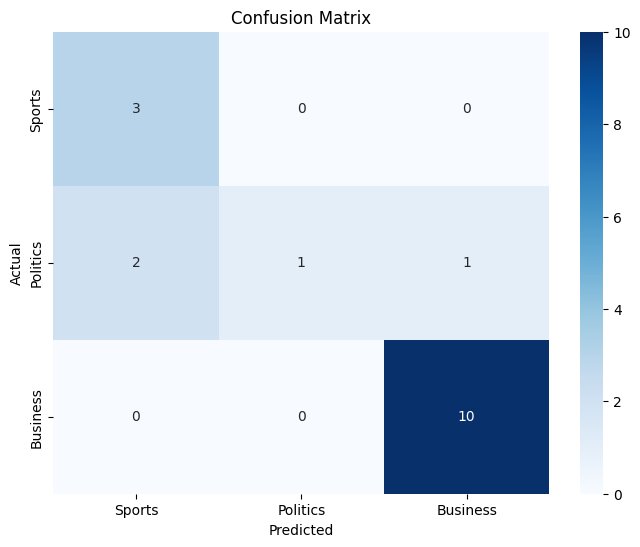

In [6]:
# Cargar los datos desde los archivos Excel
df_sports = pd.read_excel('deportes.xlsx')
df_politics = pd.read_excel('politica.xlsx')
df_business = pd.read_excel('negocios.xlsx')

# Combinar los datos en un solo DataFrame
df = pd.concat([df_sports, df_politics, df_business], ignore_index=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Title'].astype(str), df['Category'], test_size=0.2, random_state=42)

# Vectorización de los datos de texto
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenamiento del modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sports', 'Politics', 'Business'], yticklabels=['Sports', 'Politics', 'Business'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
